In [ ]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder 
plt.style.use('dark_background')

In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# Tömrlü için 0, tümörsüz için 1

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [2]:
# tömörlü görüntüler için result arrayini güncelleme

data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/data/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

NameError: ignored

In [ ]:
# tümörsüz görüntüler için result arrayini güncelleme

paths = []
for r, d, f in os.walk(r"drive/MyDrive/brain tumor/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [ ]:
data = np.array(data)
data.shape

(0,)

In [ ]:
result = np.array(result)
result = result.reshape(139,2)

NameError: ignored

In [ ]:
normalized_arr = preprocessing.normalize([result])
print(normalized_arr)

NameError: ignored

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization_10 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 64, 64, 64)       

In [ ]:
y_train.shape

(111, 2)

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 10s 3s/step - loss: 0.6931 - val_loss: 0.6932
Epoch 2/30
3/3 [==============================] - 7s 2s/step - loss: 0.6900 - val_loss: 0.6932
Epoch 3/30
3/3 [==============================] - 7s 2s/step - loss: 0.6885 - val_loss: 0.6931
Epoch 4/30
3/3 [==============================] - 7s 2s/step - loss: 0.6855 - val_loss: 0.6931
Epoch 5/30
3/3 [==============================] - 7s 2s/step - loss: 0.6832 - val_loss: 0.6931
Epoch 6/30
3/3 [==============================] - 7s 2s/step - loss: 0.6754 - val_loss: 0.6932
Epoch 7/30
3/3 [==============================] - 7s 2s/step - loss: 0.6720 - val_loss: 0.6932
Epoch 8/30
3/3 [==============================] - 7s 2s/step - loss: 0.6634 - val_loss: 0.6932
Epoch 9/30
3/3 [==============================] - 7s 2s/step - loss: 0.6620 - val_loss: 0.6931
Epoch 10/30
3/3 [==============================] - 7s 2s/step - loss: 0.6593 - val_loss: 0.6931
Epoch 11/30
3/3 [==============================]

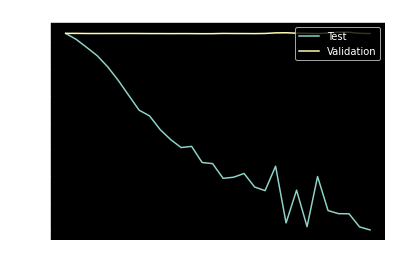

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [ ]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

99.99997615814209% Confidence This Is No, Its not a tumor


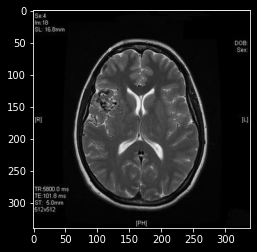

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/data/no/No14.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

# Yeni Bölüm

# Yeni Bölüm